In [1]:

# Deep Learning Applications: Gradients and Information Theory
# Week 4: Understanding Curves, Gradients, and Information Theory
# Duration: 1 Hour

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import heapq
import math
import seaborn as sns
from scipy.optimize import minimize_scalar
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


🔵 PART 1: CURVES AND DERIVATIVES
Understanding how functions behave and their slopes


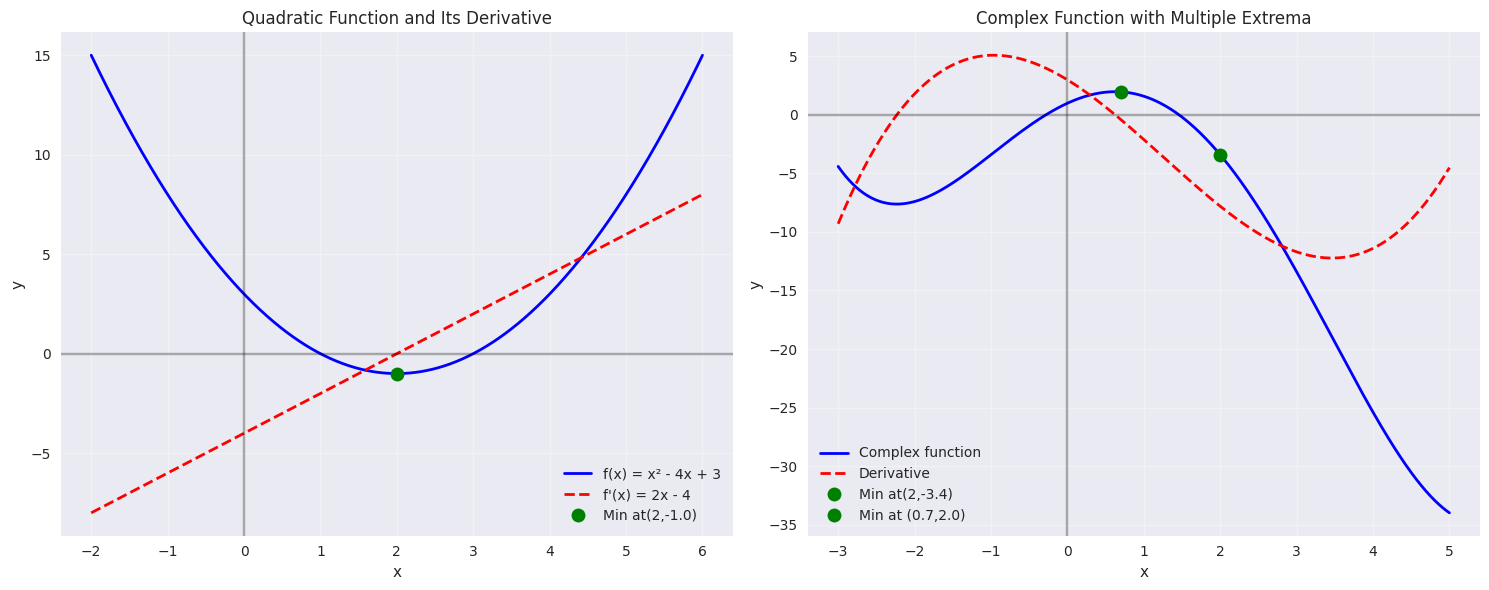

In [12]:
## Part 1: Understanding Curves and Derivatives (15 minutes)
print("\n🔵 PART 1: CURVES AND DERIVATIVES")
print("Understanding how functions behave and their slopes")

# Define some example functions
def quadratic_function(x): #이차함수
    """Simple quadratic function: f(x) = x^2 - 4x + 3"""
    return x**2-4*x+3

def derivative_quadratic(x): #이차 도함수
    """Derivative of quadratic: f'(x) = 2x - 4"""
    return 2*x-4

def complex_function(x):#4차원 함수
    """More complex function with multiple local minima"""
    return 0.1*x**4-0.5*x**3-2*x**2+3*x+1

def derivative_complex(x):#4차원 도함수
    """Derivative of complex function"""
    return 0.4*x**3-1.5*x**2-4*x+3

# Visualize functions and their derivatives
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

x = np.linspace(-2, 6, 1000)
y1 = quadratic_function(x)
dy1 = derivative_quadratic(x)

# Plot quadratic function
ax1.plot(x, y1, 'b-', linewidth=2, label='f(x) = x² - 4x + 3')
ax1.plot(x, dy1, 'r--', linewidth=2, label="f'(x) = 2x - 4")
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Quadratic Function and Its Derivative')
ax1.legend()

# Mark critical points
critical_x=2 #도함수  결과 =0 때
critical_y=quadratic_function(critical_x)
ax1.plot(critical_x,critical_y,'go',markersize=10,
         label=f'Min at({critical_x},{critical_y:.1f})')
ax1.legend()

# Plot complex function
x2=np.linspace(-3,5,1000)
y2=complex_function(x2)
dy2=derivative_complex(x2)

ax2.plot(x2, y2, 'b-', linewidth=2, label='Complex function')
ax2.plot(x2, dy2, 'r--', linewidth=2, label='Derivative')
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Complex Function with Multiple Extrema')

# Mark critical points
critical_x2=2 #도함수  결과 =0 때
critical_y2=complex_function(critical_x2)
ax2.plot(critical_x2,critical_y2,'go',markersize=10,
         label=f'Min at({critical_x2},{critical_y2:.1f})')

critical_x3=0.7 #도함수 결과=0때
critical_y3=complex_function(critical_x3)
ax2.plot(critical_x3,critical_y3,'go',markersize=10,
         label=f'Min at ({critical_x3},{critical_y3:.1f})')


ax2.legend()

plt.tight_layout()
plt.show()

In [8]:
# Plot complex function
x2=np.linspace(-3,5,1000)
y2=complex_function(x2)
dy2=derivative_complex(x2)

ax2.plot(x2, y2, 'b-', linewidth=2, label='Complex function')
ax2.plot(x2, dy2, 'r--', linewidth=2, label='Derivative')
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Complex Function with Multiple Extrema')
ax2.legend()

plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

In [ ]:
print("💡 Key Observations:")
print("   • Derivative = 0 at local minima and maxima")
print("   • Positive derivative → function is increasing")
print("   • Negative derivative → function is decreasing")
print("   • Steeper slope → larger absolute derivative value")


🔵 PART 2: GRADIENT DESCENT
Using derivatives to find minima - the heart of ML optimization!
🎯 Finding minimum of f(x) = x² - 4x + 3 using gradient descent

🚀 Starting from x = -1
   📍 Final position: x = 0.8000, y = 0.4400

🚀 Starting from x = 5
   📍 Final position: x = 3.2000, y = 0.4400

🚀 Starting from x = 0
   📍 Final position: x = 1.2000, y = -0.3600


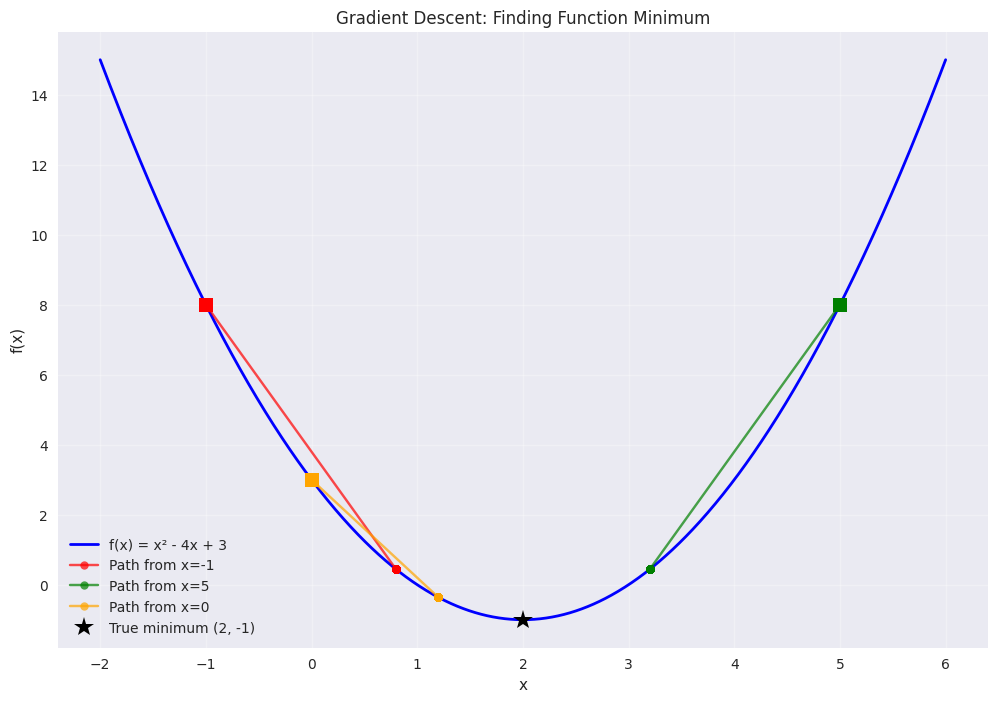


🎓 Learning Insights:
   • Gradient descent moves opposite to the gradient direction
   • Learning rate controls step size (too big = overshoot, too small = slow)
   • Different starting points can lead to the same minimum
   • Algorithm stops when gradient ≈ 0 (at minimum)


In [17]:
## Part 2: Gradient Descent Algorithm (15 minutes)
print("\n🔵 PART 2: GRADIENT DESCENT")
print("Using derivatives to find minima - the heart of ML optimization!")

def gradient_descent_1d(func, grad_func, start_x, learning_rate=0.1, max_iterations=50):
    """
    Simple 1D gradient descent implementation
    """
    x_history=[start_x]
    y_history=[func(start_x)]

    current_x=start_x
    for i in range(max_iterations): #I기본값=50
        gradient=grad_func(current_x)
        new_x=current_x-learning_rate*gradient

        x_history.append(new_x)
        y_history.append(func(new_x))

        #check for convergence 수령을 확인
        if abs(new_x-current_x)<1e-6:
            print(f"\tConverged after{i+1} interation")
            break
        
    current_x=new_x

    return x_history, y_history

# Demonstrate gradient descent on our quadratic function
print("🎯 Finding minimum of f(x) = x² - 4x + 3 using gradient descent")

start_points = [-1, 5, 0]
colors = ['red', 'green', 'orange']

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the function
x_plot = np.linspace(-2, 6, 1000)
y_plot = quadratic_function(x_plot)
ax.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x) = x² - 4x + 3')

# Run gradient descent from different starting points
for i, (start, color) in enumerate(zip(start_points, colors)):
    print(f"\n🚀 Starting from x = {start}")
    x_hist, y_hist = gradient_descent_1d(quadratic_function, derivative_quadratic, 
                                        start, learning_rate=0.3)
    
    # Plot the path
    ax.plot(x_hist, y_hist, 'o-', color=color, markersize=6, 
           label=f'Path from x={start}', alpha=0.7)
    ax.plot(start, quadratic_function(start), 's', color=color, markersize=10)
    
    print(f"   📍 Final position: x = {x_hist[-1]:.4f}, y = {y_hist[-1]:.4f}")

# Mark the true minimum
true_min_x = 2
true_min_y = quadratic_function(true_min_x)
ax.plot(true_min_x, true_min_y, 'k*', markersize=15, label=f'True minimum ({true_min_x}, {true_min_y})')

ax.grid(True, alpha=0.3)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Gradient Descent: Finding Function Minimum')
ax.legend()
plt.show()

print("\n🎓 Learning Insights:")
print("   • Gradient descent moves opposite to the gradient direction")
print("   • Learning rate controls step size (too big = overshoot, too small = slow)")
print("   • Different starting points can lead to the same minimum")
print("   • Algorithm stops when gradient ≈ 0 (at minimum)")


🔵 PART 3: 2D SURFACES AND GRADIENTS
Extending to higher dimensions - like real neural networks!


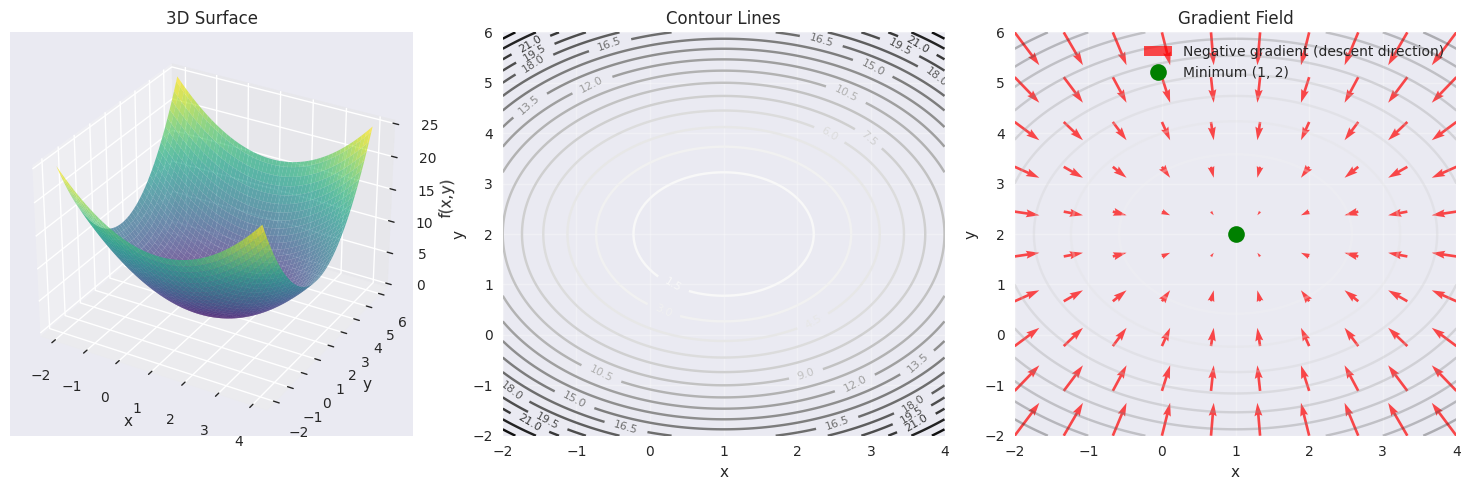

🎯 Key Concepts:
   • Gradient vectors point toward steepest ascent
   • Negative gradient points toward steepest descent
   • Contour lines connect points of equal function value
   • At minimum/maximum, gradient = zero vector


In [13]:
## Part 3: 2D Surfaces and Gradients (10 minutes)
print("\n🔵 PART 3: 2D SURFACES AND GRADIENTS")
print("Extending to higher dimensions - like real neural networks!")

def surface_function(x, y):
    """2D surface with multiple features"""
    return x**2+y**2-2*x-4*y+5

def gradient_2d(x, y):
    """Gradient of the 2D surface"""
    dx=2*x-2
    dy=2*y-4
    return np.array([dx,dy])

# Create a grid for visualization
x_range = np.linspace(-2, 4, 100)
y_range = np.linspace(-2, 6, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = surface_function(X, Y)

# Create 3D surface plot
fig = plt.figure(figsize=(15, 5))

# 3D surface
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('3D Surface')

# Contour plot
ax2 = fig.add_subplot(132)
contour = ax2.contour(X, Y, Z, levels=20)
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Lines')
ax2.grid(True, alpha=0.3)

# Gradient field
ax3 = fig.add_subplot(133)
x_arrows = np.linspace(-2, 4, 10)
y_arrows = np.linspace(-2, 6, 10)
X_arrows, Y_arrows = np.meshgrid(x_arrows, y_arrows)
DX, DY = gradient_2d(X_arrows, Y_arrows)

# Plot gradient vectors
ax3.quiver(X_arrows, Y_arrows, -DX, -DY, alpha=0.7, color='red', 
          label='Negative gradient (descent direction)')
ax3.contour(X, Y, Z, levels=10, alpha=0.3)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Gradient Field')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Mark minimum
min_x, min_y = 1, 2  # analytical minimum
ax3.plot(min_x, min_y, 'go', markersize=12, label=f'Minimum ({min_x}, {min_y})')
ax3.legend()

plt.tight_layout()
plt.show()

print("🎯 Key Concepts:")
print("   • Gradient vectors point toward steepest ascent")
print("   • Negative gradient points toward steepest descent")
print("   • Contour lines connect points of equal function value")
print("   • At minimum/maximum, gradient = zero vector")

In [ ]:
## Part 4: Information Theory Basics (20 minutes)
print("\n🔵 PART 4: INFORMATION THEORY")
print("From Claude Shannon to modern deep learning!")

# Sample text for analysis
sample_text = """
The quick brown fox jumps over the lazy dog. This pangram contains every letter 
of the alphabet at least once. Information theory helps us understand how to 
compress and transmit messages efficiently. The more predictable a message, 
the less information it contains. Surprising events carry more information.
"""

def calculate_entropy(text):
    """Calculate entropy of a text string"""
    # Count character frequencies


# Analyze our sample text
entropy, char_counts = calculate_entropy(sample_text)

print(f"📊 Text Analysis:")
print(f"   • Total characters: {len(sample_text)}")
print(f"   • Unique characters: {len(char_counts)}")
print(f"   • Entropy: {entropy:.3f} bits per character")
print(f"   • Max possible entropy: {math.log2(len(char_counts)):.3f} bits")

# Visualize character frequencies
most_common = char_counts.most_common(15)
chars, counts = zip(*most_common)

plt.figure(figsize=(12, 6))

# Character frequency plot
plt.subplot(1, 2, 1)
plt.bar(range(len(chars)), counts)
plt.xticks(range(len(chars)), [f"'{c}'" if c != ' ' else "'space'" for c in chars], rotation=45)
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Character Frequency Distribution')
plt.grid(True, alpha=0.3)

# Information content plot (surprise)
probabilities = [count/len(sample_text) for count in counts]
information_content = [-math.log2(p) for p in probabilities]

plt.subplot(1, 2, 2)
plt.bar(range(len(chars)), information_content, color='orange')
plt.xticks(range(len(chars)), [f"'{c}'" if c != ' ' else "'space'" for c in chars], rotation=45)
plt.xlabel('Characters')
plt.ylabel('Information Content (bits)')
plt.title('Information Content per Character')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Information Theory Insights:")
print("   • Common characters (like 'e', space) have low information content")
print("   • Rare characters carry more information (higher surprise)")
print("   • Entropy measures average information content")

In [ ]:
# Cross Entropy Example
print("\n🔵 CROSS ENTROPY EXAMPLE")
print("Comparing different probability distributions")

def cross_entropy(p_true, p_predicted):
    """Calculate cross entropy between true and predicted distributions"""
    # Avoid log(0) by adding small epsilon


# Example: Predicting next character probabilities
print("🎯 Scenario: Predicting next character after 'th'")

# True distribution (what actually happens after 'th')
true_chars = ['e', 'a', 'i', 'o', 'u', 'other']
true_probs = np.array([0.6, 0.15, 0.1, 0.05, 0.05, 0.05])  # 'e' is most common after 'th'

# Different prediction models


print(f"{'Model':<15} {'Cross Entropy':<15} {'Performance'}")
print("-" * 45)

for model_name, predicted_probs in models.items():
    ce = cross_entropy(true_probs, predicted_probs)
    if ce < 2:
        performance = "Excellent"
    elif ce < 3:
        performance = "Good"
    elif ce < 4:
        performance = "Poor"
    else:
        performance = "Very Poor"
    
    print(f"{model_name:<15} {ce:<15.3f} {performance}")

# Visualize the distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
width = 0.35
x_pos = np.arange(len(true_chars))

for i, (model_name, predicted_probs) in enumerate(models.items()):
    ax = axes[i]
    ax.bar(x_pos - width/2, true_probs, width, label='True Distribution', alpha=0.7)
    ax.bar(x_pos + width/2, predicted_probs, width, label='Predicted Distribution', alpha=0.7)
    ax.set_xlabel('Characters after "th"')
    ax.set_ylabel('Probability')
    ax.set_title(f'{model_name}')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(true_chars)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
